In [1]:
# Importing Libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [2]:
# Loading dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

In [3]:
# Analyzing Dataset attribures
print(dataset.shape)
print(dataset.head(5))
print(dataset.describe())
print(dataset.groupby('class').size())

(150, 5)
   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
class
Iris-setosa        50
Iris-vers

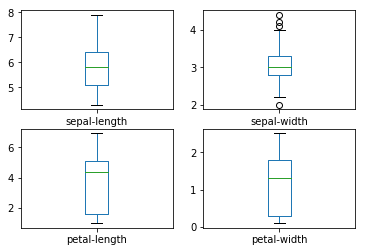

In [4]:
# Data visualization
#BoxPlots
dataset.plot(kind='box',subplots=True, layout=(2,2))
plt.show()

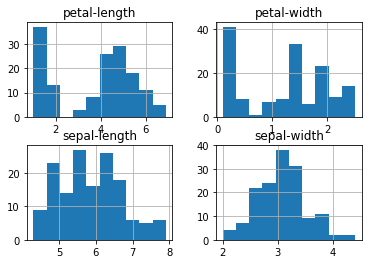

In [5]:
#Histogram
dataset.hist()
plt.show()

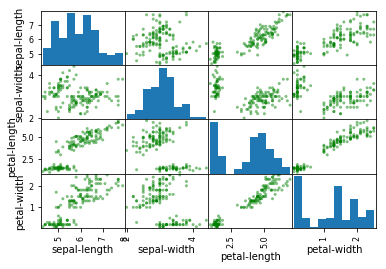

In [6]:
# Scatter Plot Matrix
scatter_matrix(dataset, color="Green")
plt.show()

In [7]:
# Splitting the dataset
array= dataset.values
array

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
       [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
       [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
       [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
       [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'],
       [4.6, 3.6, 1.0, 0.2, 'Iri

In [8]:
x = array[:,0:4]
Y = array[:,4]
validation_size=0.20
seed=7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(x, Y, test_size=validation_size, random_state=seed)

In [9]:
# Building models
seed = 7
scoring = 'accuracy'
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LDA: 0.975000 (0.038188)
NB: 0.975000 (0.053359)


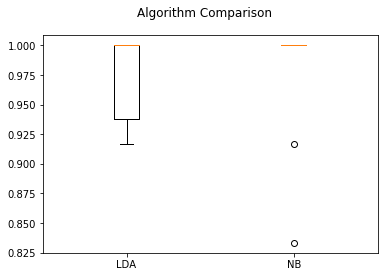

In [10]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [11]:
# Making predictions on validation dataset
NB = GaussianNB()
NB.fit(X_train, Y_train)
predictions = NB.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

#LDA
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, Y_train)
predictions1 = LDA.predict(X_validation)
print(accuracy_score(Y_validation, predictions1))
print(confusion_matrix(Y_validation, predictions1))
print(classification_report(Y_validation, predictions1))

0.833333333333
[[7 0 0]
 [0 9 3]
 [0 2 9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.82      0.75      0.78        12
 Iris-virginica       0.75      0.82      0.78        11

    avg / total       0.84      0.83      0.83        30

0.966666666667
[[ 7  0  0]
 [ 0 11  1]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.92      1.00      0.96        11

    avg / total       0.97      0.97      0.97        30



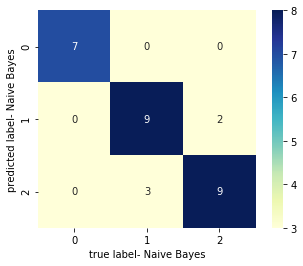

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
mat = confusion_matrix(Y_validation, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, cmap="YlGnBu",vmin=3,vmax=8)
plt.xlabel('true label- Naive Bayes')
plt.ylabel('predicted label- Naive Bayes')
plt.show()

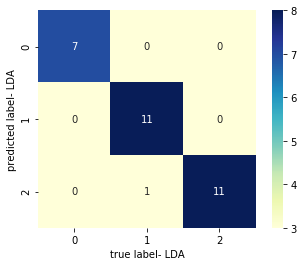

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
mat = confusion_matrix(Y_validation, predictions1)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, cmap="YlGnBu",vmin=3,vmax=8)
plt.xlabel('true label- LDA')
plt.ylabel('predicted label- LDA')
plt.show()

# Conclusion- 
Linear discriminant analysis performs better than naive bayes. The accuracy for LDA is 97% while for naive bayes it is 83%. 